   # HEART FAILURE PREDICTION 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing dataset

In [2]:
df=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\desk\heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#### Chest pain type :- ATA(Atypical angina), ASY(Asymptomatic), NAP(Non anginal pain), TA(Typical angina)

#### Fasting BS- 1 if BS>120 mg/dl otherwise 0

#### Resting ECG:- Normal, ST (Having ST-T wave abnormality, T wave inversion or depression> 0.05 mV), LVH (showing probable or definite left ventricular hypertrophy by Estes criteria), 

#### Old peak:- St depression induced by exercise relative to rest

#### ST_Slope:- the slope of the peak exercise ST segment 

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df.shape

(918, 12)

There are 918 rows and 12 attributes

In [11]:
df.size

11016

The size of the dataset is 11016

In [12]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [13]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


There are no null values

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [12]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

There are 508 person having heart disease and 410 persons not having any heart disease

###  What is the minimum and maximum age in dataset?

In [13]:
#1
max_age=df["Age"].max()
min_age=df["Age"].min()
print("Maximum age is",max_age)
print("Minimum age is",min_age)


Maximum age is 77
Minimum age is 28


###  What is the maximum value Resting BP?

In [14]:
#2
max_rbp=df["RestingBP"].max()

print("Maximum Resting BP is",max_rbp)


Maximum Resting BP is 200


### What is the maximum value Cholesterol?

In [15]:
#3
max_chl=df["Cholesterol"].max()

print("Maximum Cholesterol is",max_chl)


Maximum Cholesterol is 603


###  What is the maximum heart rate?

In [16]:
#4
max_mhr=df["MaxHR"].max()

print("Maximum Heartrate is",max_mhr)


Maximum Heartrate is 202


###  What is the maximum Old peak?

In [17]:
#5
max_op=df["Oldpeak"].max()

print("Maximum Oldpeak is",max_op)


Maximum Oldpeak is 6.2


###  What is the ratio of people suffering from Fasting BS?

<AxesSubplot:>

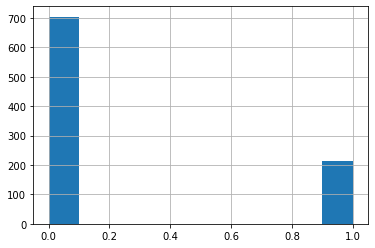

In [18]:
df.FastingBS.hist()

700 people have fasting BS less than 120 mg/dl whereas there are 200 people having fasting BS greater than 120 mg/dl

###  Among ATA, NAP, ASY, TA, which has the highest patients?

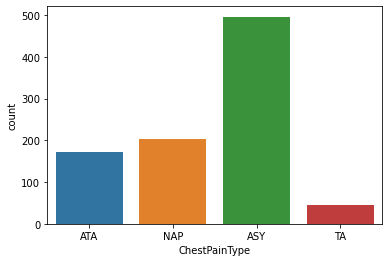

In [19]:
sns.countplot(x="ChestPainType",data=df)
plt.show()

From the graph, we can see that most of the people have ASY

###  Which age group is dominant in the dataset?

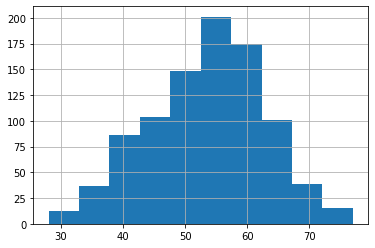

In [20]:
df.Age.hist()
plt.show()

people between age 53 - 58 are dominant in the dataset.

### What is the distribution of Maximum heart rate

<AxesSubplot:>

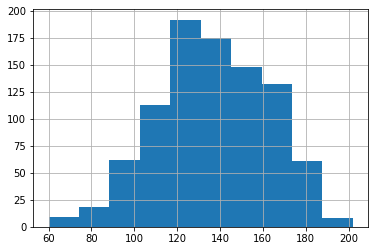

In [21]:
df.MaxHR.hist()

More than 175 people have maximum heart rate between 120-140.

###  What is the distribution of  Cholesterol?

<AxesSubplot:>

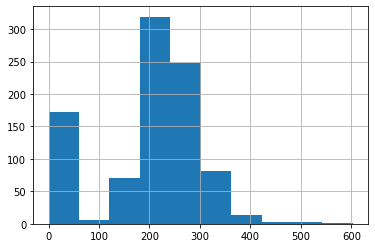

In [28]:
df.Cholesterol.hist()

###   Does majority of people have Exercise Angina

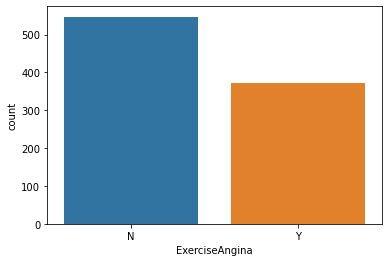

In [29]:
sns.countplot(x="ExerciseAngina", data=df)
plt.show()

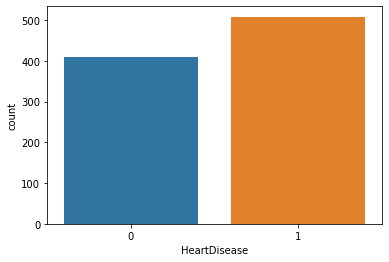

In [30]:
sns.countplot(x="HeartDisease", data=df)
plt.show()

Majority of the people dont have Exercise Angina

###   How many people have oldpeak between -1 and 0?

<AxesSubplot:>

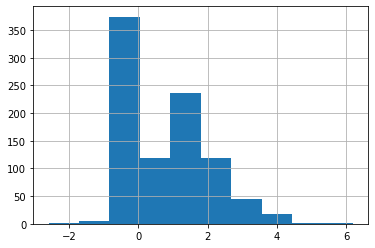

In [137]:
df.Oldpeak.hist()

More than 350 people have old peak between -1 and 0

###  What is the distribution of Chest pain type?

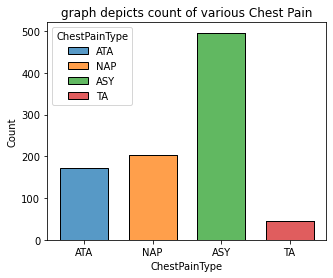

In [212]:
plt.figure(figsize=(5,4))
plt.title("graph depicts count of various Chest Pain")
sns.histplot(data=df, x="ChestPainType", hue="ChestPainType", multiple="stack", shrink=.7)
plt.show()

More than 150 people have ATA, 
200 people have NAP, 
Over 500 people have ASY, 
Less than 50 people have TA

###  What is the distribution of Resting ECG?

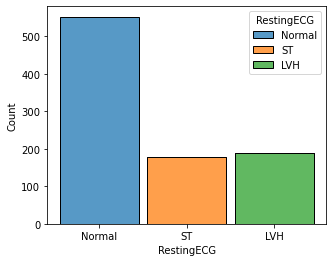

In [211]:
plt.figure(figsize=(5,4))
sns.histplot(data=df, x="RestingECG", hue="RestingECG", multiple="stack", shrink=.9)
plt.show()

Majority of people have normal ECG

###  What is the distribution of Exercise Angina?

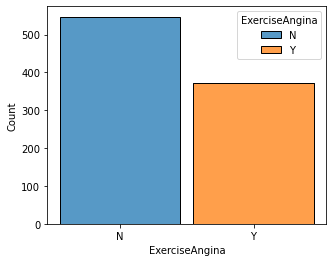

In [210]:
plt.figure(figsize=(5,4))
sns.histplot(data=df, x="ExerciseAngina", hue="ExerciseAngina", multiple="stack", shrink=.9)
plt.show()

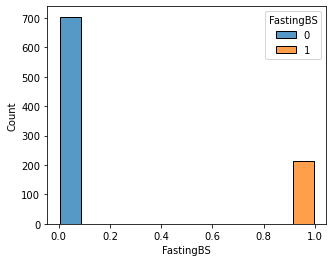

In [27]:
plt.figure(figsize=(5,4))
sns.histplot(data=df, x="FastingBS", hue="FastingBS", multiple="stack", shrink=.9)
plt.show()

Majority of people dont have Exercise Angina

###  What is the distribution of ST_Slope?

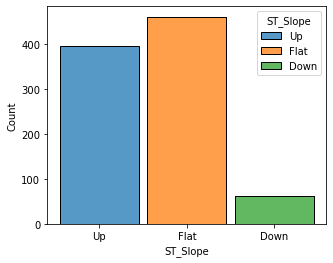

In [209]:
plt.figure(figsize=(5,4))
sns.histplot(data=df, x="ST_Slope", hue="ST_Slope", multiple="stack", shrink=.9)
plt.show()

Over 400 people have Up ST_Slope, more than 400 people have Flat ST_Slope, less than 100 people have Down ST_Slope

###  Which value of Resting BP is found in most people?

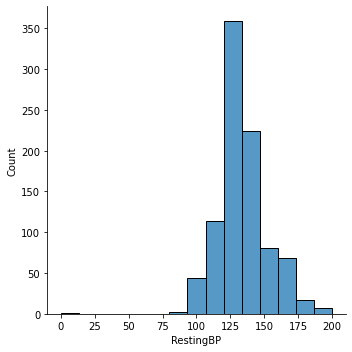

In [208]:
sns.displot(df, x="RestingBP", bins=15)
plt.show()

125

###  What is the relation between Fasting BS and Heart disease?

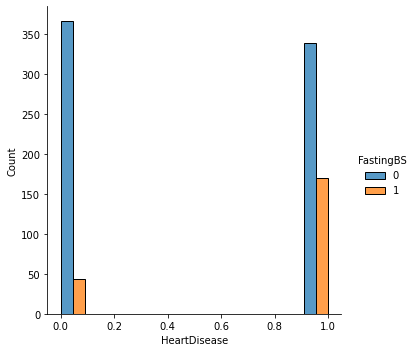

In [207]:
sns.displot(df, x="HeartDisease", hue="FastingBS", multiple="dodge")
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


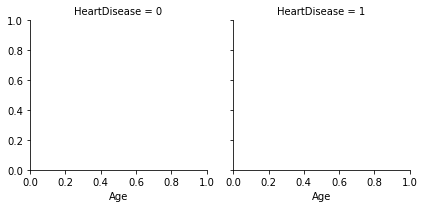

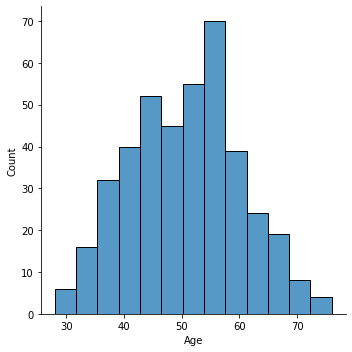

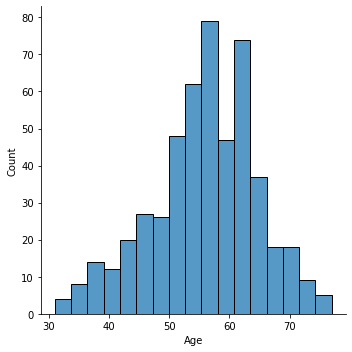

In [24]:
g=sns.FacetGrid(df, col='HeartDisease')
g=g.map(sns.displot, 'Age')
plt.show()

It depicts that less the fasting BS, then its less likely to have heart disease

### What is the relation between Exercise angina and gender?

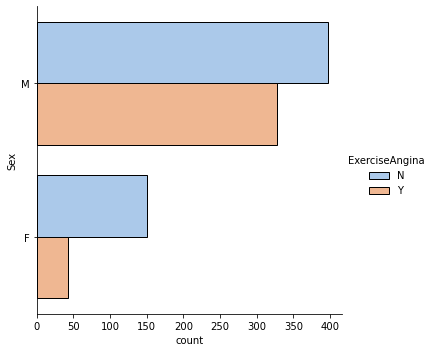

In [206]:
sns.catplot(
    data=df, y="Sex", hue="ExerciseAngina", kind="count",
    palette="pastel", edgecolor=".0",
)
plt.show()

Males are more prone to Exercise Angina

###  What is the relation between Exercise angina and Chestpain type

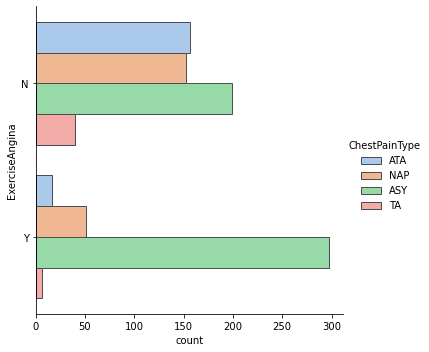

In [205]:
sns.catplot(
    data=df, y="ExerciseAngina", hue="ChestPainType", kind="count",
    palette="pastel", edgecolor=".3",
)
plt.show()

It shows that if a person has exercise angina then he/she is suffering from ASY

###  What is the relation between exercise angina and ST Slope?

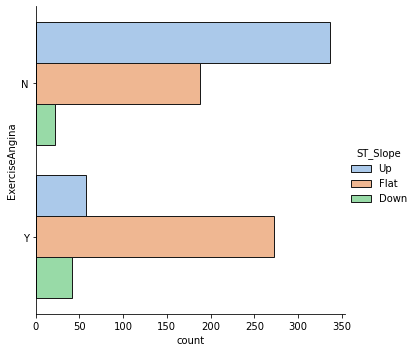

In [204]:
sns.catplot(
    data=df, y="ExerciseAngina", hue="ST_Slope", kind="count",
    palette="pastel", edgecolor=".1",
)
plt.show()

It shows that if you dont have exercise angina then you have Up ST_Slope.

###  Which range of oldpeak is more prone to heart disease?

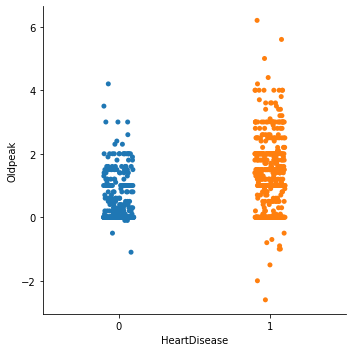

In [203]:
sns.catplot(data=df, x="HeartDisease", y="Oldpeak")
plt.show()

1-6

### What is the relation between heart disease and ECG?

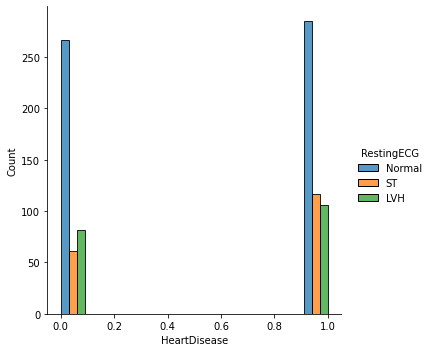

In [202]:
sns.displot(df, x="HeartDisease", hue="RestingECG", multiple="dodge")
plt.show()

###  What is the relation between Resting ECG and Heart disease?

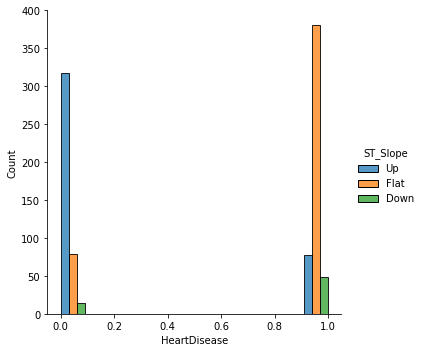

In [157]:
sns.displot(df, x="HeartDisease", hue="ST_Slope", multiple="dodge")
plt.show()

If a person has flat ST_slope then he is likely to have a heart disease

### In dataset, which gender is more likely to have a higher count of Oldpeak?

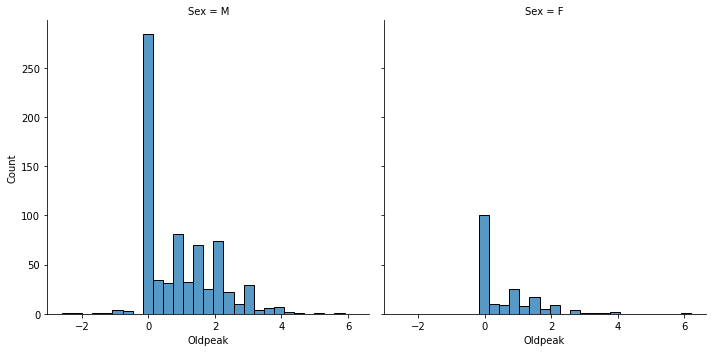

In [201]:
sns.displot(df, x="Oldpeak", col="Sex")
plt.show()

Male

###  Who is more likely to have a heart disease?

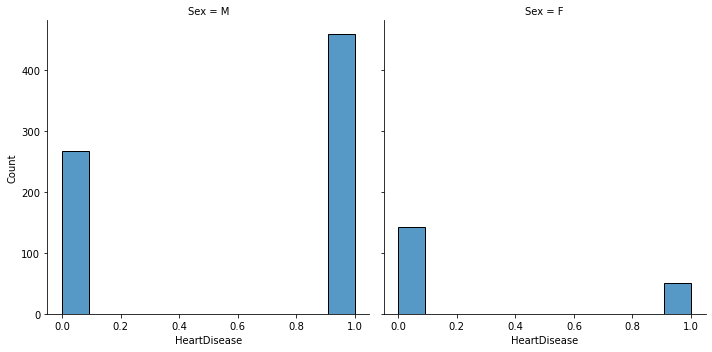

In [200]:
sns.displot(df, x="HeartDisease", col="Sex")
plt.show()



Male

###  Which value of Resting BP is seen most in dataset?

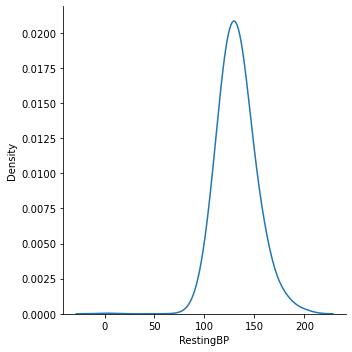

In [199]:
sns.displot(df, x="RestingBP", kind="kde", bw_adjust=2)
plt.show()

Values between 100-150 is seen the most in dataset

###  Which value of maximum heart rate is seen most in dataset?

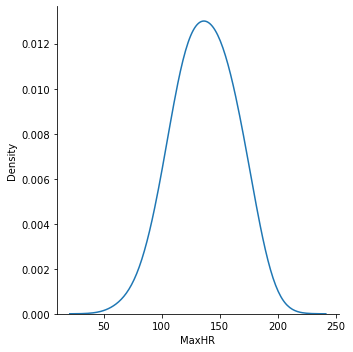

In [198]:
sns.displot(df, x="MaxHR", kind="kde", bw_adjust=2)
plt.show()

Values between 110-150 is seen the most in dataset

###  Which value of old peak is seen most in dataset?

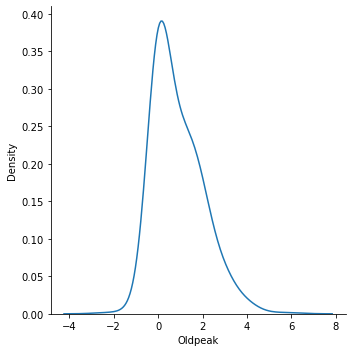

In [197]:
sns.displot(df, x="Oldpeak", kind="kde", bw_adjust=2)
plt.show()

Values between 0-1 is seen the most in dataset


###  Which age group is more prone to ASY?

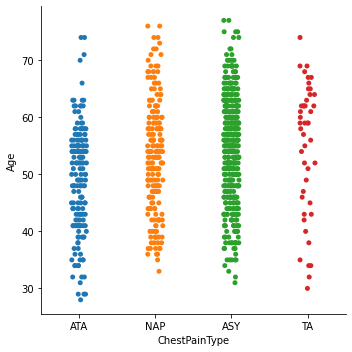

In [196]:
sns.catplot(data=df, x="ChestPainType", y="Age")
plt.show()

45-65

###  Which chestpain type is least observed in people?

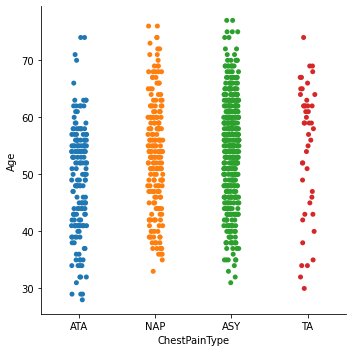

In [195]:
sns.catplot(data=df, x="ChestPainType", y="Age")
plt.show()


TA


###   Which age group have higher number of heart disease cases?

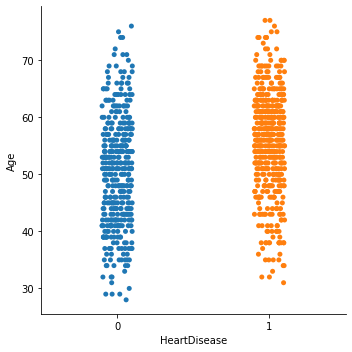

In [194]:
sns.catplot(data=df, x="HeartDisease", y="Age")
plt.show()

This graph depicts that people between age group 50-65 have more heart disease cases

###   Which chest pain type is more prone to male and female?

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


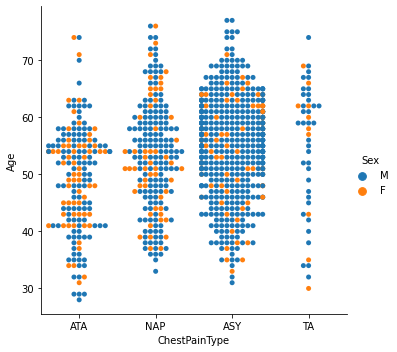

In [193]:
sns.catplot(data=df, x="ChestPainType", y="Age", hue="Sex", kind="swarm")
plt.show()

It is observed that ASY chestpain is seen more in males whereas ATA chestpain is seen more in females

### Does fasting BS depends on Age and Chest pain type?



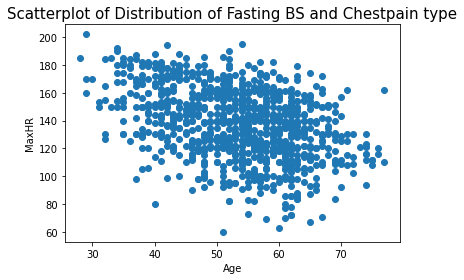

In [26]:
plt.scatter(df['Age'], df['MaxHR'])
plt.title('Scatterplot of Distribution of Fasting BS and Chestpain type', fontsize=15)
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()

Age group 45-65 have the maximum heart rate range 150-180


###  Is there any null values in dataset?

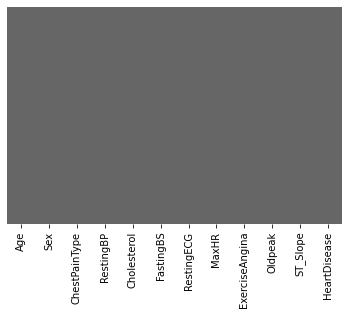

In [191]:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = 'Dark2_r')
plt.show()

There are no null values in dataset

###  What is the relation between Age and Resting ECG?

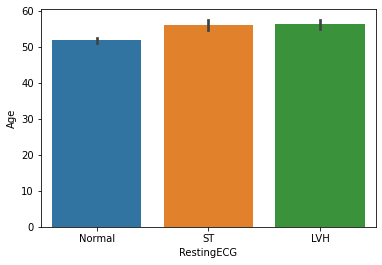

In [190]:
sns.barplot(x="RestingECG",y="Age",data=df)
plt.show()

  people having age 50 have usually normal Resting ECG whereas people above age 50 experience ST and LVH

###  Find count of male and female in the dataset

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


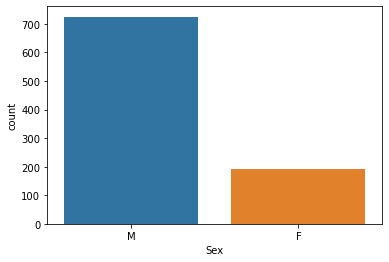

In [189]:
sns.countplot(df['Sex'])
plt.show()

There are 700 males and 200 females

### What is the gender distribution according to the target value

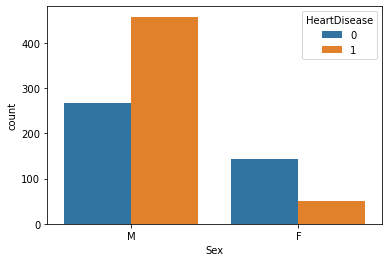

In [188]:
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.show()

About 450 males have heart disease whereas around 60 females have heart disease

###  Check the age distribution of the dataset

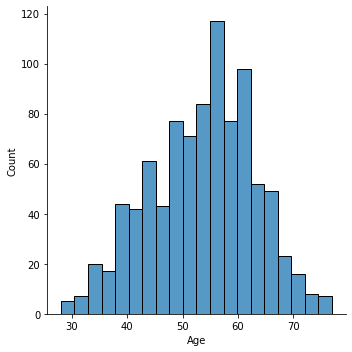

In [187]:
sns.displot(df['Age'],bins=20)
plt.show()

There are majority of people betwee age 60-70

###  Is chest pain related to heart disease

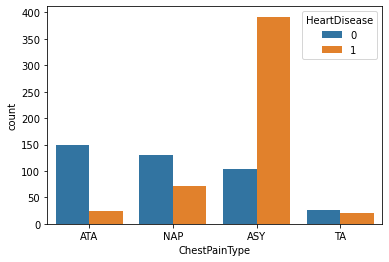

In [186]:
sns.countplot(x="ChestPainType", hue="HeartDisease",data=df)
plt.show()

People with ASY chest pain have the higher chances of heart disease

###  What is the relation between ST_slope and Heart disease?

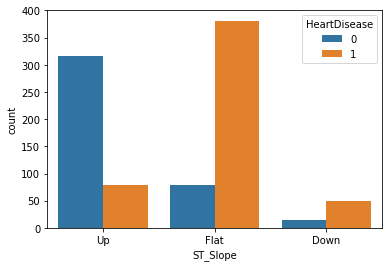

In [185]:
sns.countplot(x="ST_Slope", hue="HeartDisease",data=df)
plt.show()

People having flat ST_Slope are more likely to have heart disease

###  What is the correlation Matrix?

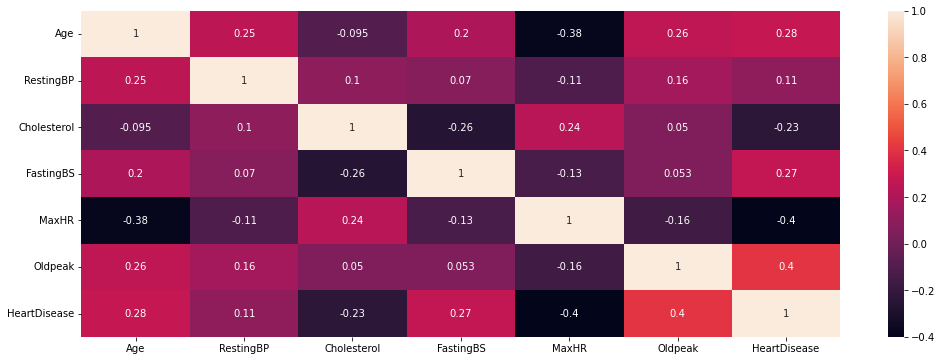

In [184]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0



In [8]:
from imblearn.over_sampling import RandomOverSampler


# ENCODING

In [9]:
encode = {"M":0,"F":1}
df['Sex'] = df['Sex'].replace(encode)

In [10]:
encode = {"N":0,"Y":1}
df['ExerciseAngina'] = df['ExerciseAngina'].replace(encode)
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [11]:
df1=df

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['ChestPainType'] = label_encoder.fit_transform(df1['ChestPainType'])
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,2,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,1,130,283,0,ST,98,0,0.0,Up,0
3,48,1,0,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,2,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,Normal,132,0,1.2,Flat,1
914,68,0,0,144,193,1,Normal,141,0,3.4,Flat,1
915,57,0,0,130,131,0,Normal,115,1,1.2,Flat,1
916,57,1,1,130,236,0,LVH,174,0,0.0,Flat,1


In [13]:
label_encoder = preprocessing.LabelEncoder()
df1['ST_Slope'] = label_encoder.fit_transform(df1['ST_Slope'])
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,Normal,172,0,0.0,2,0
1,49,1,2,160,180,0,Normal,156,0,1.0,1,1
2,37,0,1,130,283,0,ST,98,0,0.0,2,0
3,48,1,0,138,214,0,Normal,108,1,1.5,1,1
4,54,0,2,150,195,0,Normal,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,Normal,132,0,1.2,1,1
914,68,0,0,144,193,1,Normal,141,0,3.4,1,1
915,57,0,0,130,131,0,Normal,115,1,1.2,1,1
916,57,1,1,130,236,0,LVH,174,0,0.0,1,1


In [20]:
label_encoder = preprocessing.LabelEncoder()
df1['RestingECG'] = label_encoder.fit_transform(df1['RestingECG'])
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,2,0
1,49,1,2,160,180,0,1,156,0,1.0,1,1
2,37,0,1,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,1,108,1,1.5,1,1
4,54,0,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,1,132,0,1.2,1,1
914,68,0,0,144,193,1,1,141,0,3.4,1,1
915,57,0,0,130,131,0,1,115,1,1.2,1,1
916,57,1,1,130,236,0,0,174,0,0.0,1,1


<AxesSubplot:xlabel='Sex'>

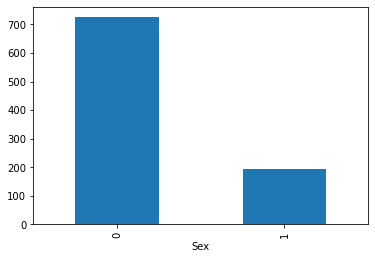

In [21]:
df.pivot_table(index='Sex', aggfunc='size').plot(kind='bar')

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, stratify=df.Sex)

<AxesSubplot:title={'center':'Verify that class distributuion in train is same as input data'}, xlabel='Sex'>

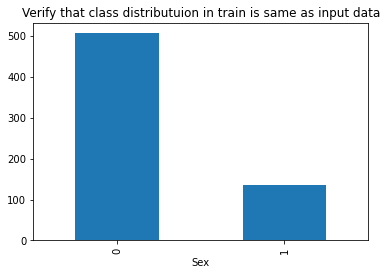

In [23]:
train.pivot_table(index='Sex', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in train is same as input data')


In [24]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train[['Age',	'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina','Oldpeak','ST_Slope']], train['Sex'])

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='Sex'>

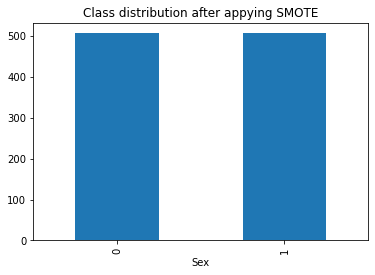

In [25]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Sex')


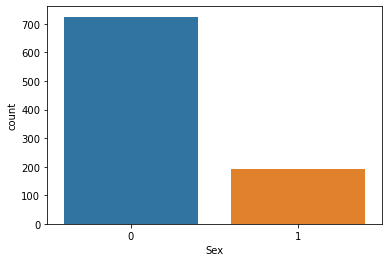

In [26]:
sns.countplot(x="Sex", data=df)
plt.show()

# SPLITTING OF DATASET

In [27]:
x=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 3)

In [29]:
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (688, 11)
Shape of x_test : (230, 11)
Shape of y_train : (688,)
Shape of y_test : (230,)


# LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
print(y_pred)

[1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1
 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0
 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1
 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 1 0 1 1]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm=confusion_matrix(y_test,y_pred)

In [24]:
print(cm)

[[ 92  12]
 [ 18 108]]


In [25]:
from sklearn import metrics

In [26]:
score = metrics.accuracy_score(y_test,y_pred)
score

0.8695652173913043

Score :  0.8695652173913043


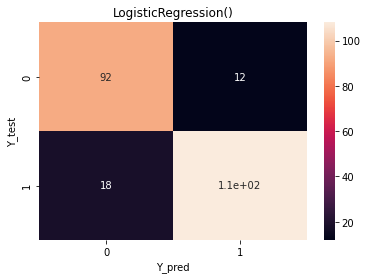

In [27]:
pred_list = [log_reg]

for i in pred_list:
    print("Score : ",i.score(x_test,y_test))
    y_pred = i.predict(x_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

# DECISION TREE

In [28]:
from sklearn import tree

In [29]:
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
model.score(x_test,y_test)

0.8434782608695652

# RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier


In [32]:
x=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)

In [33]:
regressor = RandomForestClassifier(n_estimators=1000, max_features=9)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [34]:

y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [35]:
regressor.score(x_test,y_test)

0.8840579710144928

# KNN CLASSIFIER

In [36]:
from sklearn.neighbors import KNeighborsClassifier


In [37]:
knc = KNeighborsClassifier(n_neighbors=10)
knc=knc.fit(x_train,y_train)
y_knc=knc.predict(x_test)

In [38]:
y_knc

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [39]:
knc.score(x_test,y_test)

0.7318840579710145

# SUPPORT VECTOR MACHINE

In [40]:
from sklearn.svm import SVC

In [41]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

In [42]:

y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [43]:
svm_model.score(x_test,y_test)

0.8768115942028986

# NAIVE BAYES

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)

In [46]:
nb_model.score(x_test,y_test)

0.8768115942028986